In [1]:
import qiskit

In [2]:
pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to c:\users\anirudh\appdata\local\temp\pip-req-build-11_dav_k
Note: you may need to restart the kernel to use updated packages.
  Created wheel for qiskit-textbook: filename=qiskit_textbook-0.1.0-py3-none-any.whl size=17069 sha256=d712d4154a26c20a9d170b69f347252a80b2a77b3a76a2263e58b50c2c6f695a
  Stored in directory: C:\Users\ANIRUDH\AppData\Local\Temp\pip-ephem-wheel-cache-icllx5d8\wheels\80\c4\dd\b7ea1ee2a7247e8997db78bc777bbe22e61ab1e5ed1c4b46e1
Successfully built qiskit-textbook


In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # Makes the images look nice
import matplotlib.pyplot as plt

#Import Qiskit classes
import qiskit
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, thermal_relaxation_error

#Import the qv function
import qiskit.ignis.verification.quantum_volume as qv

In [4]:
# qubit_lists: list of list of qubit subsets to generate QV circuits
qubit_lists = [[0,1,3],[0,1,3,5],[0,1,3,5,7],[0,1,3,5,7,10]]
# ntrials: Number of random circuits to create for each subset
ntrials = 50

In [5]:
qv_circ, qv_circs_nomeas = qv.qv_circuits(qubit_lists, ntrials)

C:\Users\ANIRUDH\anaconda3\lib\site-packages\qiskit\ignis\verification\quantum_volume\circuits.py:67: DeprecationWarning: Using a qubit list to map a virtual circuit to a physical layout is deprecated and will be removed in a future release. Instead use ''qiskit.transpile' with the 'initial_layout' parameter
  warnings.warn("Using a qubit list to map a virtual circuit to "
C:\Users\ANIRUDH\anaconda3\lib\site-packages\qiskit\ignis\verification\quantum_volume\circuits.py:67: DeprecationWarning: Using a qubit list to map a virtual circuit to a physical layout is deprecated and will be removed in a future release. Instead use ''qiskit.transpile' with the 'initial_layout' parameter
  warnings.warn("Using a qubit list to map a virtual circuit to "
C:\Users\ANIRUDH\anaconda3\lib\site-packages\qiskit\ignis\verification\quantum_volume\circuits.py:67: DeprecationWarning: Using a qubit list to map a virtual circuit to a physical layout is deprecated and will be removed in a future release. Instea

In [6]:
qv_circs_nomeas[0] = qiskit.compiler.transpile(qv_circs_nomeas[0], basis_gates=['u1','u2','u3','cx'])

In [7]:
print(qv_circs_nomeas[0][0])

global phase: -1.0242
     ┌────────────────────────────┐                                   »
q_0: ┤ U3(0.64472,-2.3757,1.3117) ├───────────────────────────────────»
     ├────────────────────────────┤┌───┐    ┌───────────────┐    ┌───┐»
q_1: ┤ U3(2.8978,-3.3753,0.87765) ├┤ X ├────┤ U2(-π,-3.109) ├────┤ X ├»
     └┬──────────────────────────┬┘└─┬─┘┌───┴───────────────┴───┐└─┬─┘»
q_2: ─┤ U3(1.176,2.3137,0.88699) ├───■──┤ U3(0.94403,-3π/2,π/2) ├──■──»
      └──────────────────────────┘      └───────────────────────┘     »
«                                                               ┌───┐»
«q_0: ──────────────────────────────────────────────────────────┤ X ├»
«         ┌─────────────┐    ┌───┐┌────────────────────────────┐└─┬─┘»
«q_1: ────┤ U2(0,-3π/2) ├────┤ X ├┤ U3(2.637,-0.91889,0.52513) ├──■──»
«     ┌───┴─────────────┴───┐└─┬─┘├───────────────────────────┬┘     »
«q_2: ┤ U3(0.21975,-π,-π/2) ├──■──┤ U3(1.7515,-2.7913,1.6088) ├──────»
«     └─────────────────────┘     └─────────────

In [8]:
#The Unitary is an identity (with a global phase)
backend = qiskit.Aer.get_backend('statevector_simulator')
ideal_results = []
for trial in range(ntrials):
    print('Simulating trial %d'%trial)
    ideal_results.append(qiskit.execute(qv_circs_nomeas[trial], backend=backend).result())

Simulating trial 0
Simulating trial 1
Simulating trial 2
Simulating trial 3
Simulating trial 4
Simulating trial 5
Simulating trial 6
Simulating trial 7
Simulating trial 8
Simulating trial 9
Simulating trial 10
Simulating trial 11
Simulating trial 12
Simulating trial 13
Simulating trial 14
Simulating trial 15
Simulating trial 16
Simulating trial 17
Simulating trial 18
Simulating trial 19
Simulating trial 20
Simulating trial 21
Simulating trial 22
Simulating trial 23
Simulating trial 24
Simulating trial 25
Simulating trial 26
Simulating trial 27
Simulating trial 28
Simulating trial 29
Simulating trial 30
Simulating trial 31
Simulating trial 32
Simulating trial 33
Simulating trial 34
Simulating trial 35
Simulating trial 36
Simulating trial 37
Simulating trial 38
Simulating trial 39
Simulating trial 40
Simulating trial 41
Simulating trial 42
Simulating trial 43
Simulating trial 44
Simulating trial 45
Simulating trial 46
Simulating trial 47
Simulating trial 48
Simulating trial 49


In [10]:
qv_fitter = qv.QVFitter(qubit_lists=qubit_lists)
qv_fitter.add_statevectors(ideal_results)

In [13]:
for qubit_list in qubit_lists:
    l = len(qubit_list)
    print ('qv_depth_'+str(l)+'_trial_0:', qv_fitter._heavy_outputs['qv_depth_'+str(l)+'_trial_0'])

qv_depth_3_trial_0: ['011', '100', '101', '111']
qv_depth_4_trial_0: ['0001', '0010', '0011', '1000', '1001', '1011', '1100', '1101']
qv_depth_5_trial_0: ['00011', '00100', '00111', '01000', '01010', '01011', '01100', '01101', '01110', '01111', '10101', '11010', '11011', '11101', '11110', '11111']
qv_depth_6_trial_0: ['000000', '000001', '000010', '000011', '000100', '000111', '001000', '001010', '001100', '001110', '001111', '010001', '010011', '010100', '010110', '011001', '011011', '011110', '011111', '100001', '100011', '100111', '101001', '101010', '101100', '101101', '101111', '110010', '110011', '111001', '111100', '111111']


In [14]:
for qubit_list in qubit_lists:
    l = len(qubit_list)
    print ('qv_depth_'+str(l)+'_trial_0:', qv_fitter._heavy_output_prob_ideal['qv_depth_'+str(l)+'_trial_0'])

qv_depth_3_trial_0: 0.8320578725592489
qv_depth_4_trial_0: 0.810233149225437
qv_depth_5_trial_0: 0.8330754808692046
qv_depth_6_trial_0: 0.8339637055694757


In [15]:
noise_model = NoiseModel()
p1Q = 0.002
p2Q = 0.02
noise_model.add_all_qubit_quantum_error(depolarizing_error(p1Q, 1), 'u2')
noise_model.add_all_qubit_quantum_error(depolarizing_error(2*p1Q, 1), 'u3')
noise_model.add_all_qubit_quantum_error(depolarizing_error(p2Q, 2), 'cx')
#noise_model = None

In [18]:
backend = qiskit.Aer.get_backend('qasm_simulator')
basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 1024
exp_results = []
for trial in range(ntrials):
    print('Running trial %d'%trial)
    exp_results.append(qiskit.execute(qv_circ[trial], basis_gates=basis_gates, backend=backend, noise_model=noise_model, backend_options={'max_parallel_experiments': 0}).result())

Running trial 0


<ipython-input-18-106496dad939>:7: DeprecationWarning: Using `backend_options` kwarg has been deprecated as of qiskit-aer 0.7.0 and will be removed no earlier than 3 months from that release date. Runtime backend options should now be added directly using kwargs for each option.
  exp_results.append(qiskit.execute(qv_circ[trial], basis_gates=basis_gates, backend=backend, noise_model=noise_model, backend_options={'max_parallel_experiments': 0}).result())


Running trial 1
Running trial 2
Running trial 3
Running trial 4
Running trial 5
Running trial 6
Running trial 7
Running trial 8
Running trial 9
Running trial 10
Running trial 11
Running trial 12
Running trial 13
Running trial 14
Running trial 15
Running trial 16
Running trial 17
Running trial 18
Running trial 19
Running trial 20
Running trial 21
Running trial 22
Running trial 23
Running trial 24
Running trial 25
Running trial 26
Running trial 27
Running trial 28
Running trial 29
Running trial 30
Running trial 31
Running trial 32
Running trial 33
Running trial 34
Running trial 35
Running trial 36
Running trial 37
Running trial 38
Running trial 39
Running trial 40
Running trial 41
Running trial 42
Running trial 43
Running trial 44
Running trial 45
Running trial 46
Running trial 47
Running trial 48
Running trial 49


In [19]:
qv_fitter.add_data(exp_results)
for qubit_list in qubit_lists:
    l = len(qubit_list)
    #print (qv_fitter._heavy_output_counts)
    print ('qv_depth_'+str(l)+'_trial_0:', qv_fitter._heavy_output_counts['qv_depth_'+str(l)+'_trial_0'])

qv_depth_3_trial_0: 823
qv_depth_4_trial_0: 717
qv_depth_5_trial_0: 719
qv_depth_6_trial_0: 645


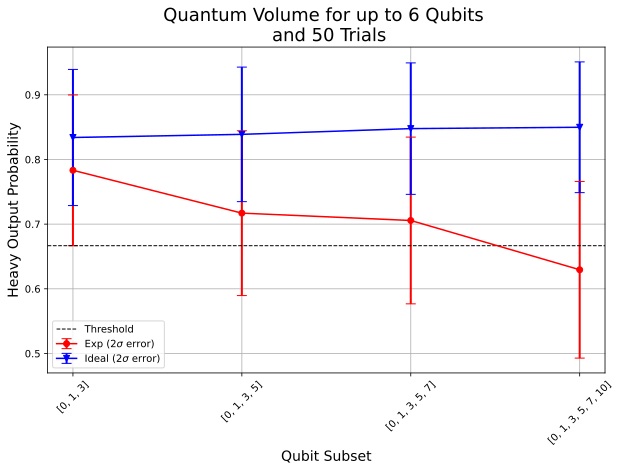

In [20]:
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot the essence by calling plot_rb_data
qv_fitter.plot_qv_data(ax=ax, show_plt=False)

# Add title and label
ax.set_title('Quantum Volume for up to %d Qubits \n and %d Trials'%(len(qubit_lists[-1]), ntrials), fontsize=18)

plt.show()

In [21]:
qv_success_list = qv_fitter.qv_success()
qv_list = qv_fitter.ydata
QV = 1
for qidx, qubit_list in enumerate(qubit_lists):
    if qv_list[0][qidx]>2/3:
        if qv_success_list[qidx][0]:
            print("Width/depth %d greater than 2/3 (%f) with confidence %f (successful). Quantum volume %d"%
                  (len(qubit_list),qv_list[0][qidx],qv_success_list[qidx][1],qv_fitter.quantum_volume()[qidx]))
            QV = qv_fitter.quantum_volume()[qidx]
        else:
            print("Width/depth %d greater than 2/3 (%f) with confidence %f (unsuccessful)."%
                  (len(qubit_list),qv_list[0][qidx],qv_success_list[qidx][1]))
    else:
        print("Width/depth %d less than 2/3 (unsuccessful)."%len(qubit_list))

Width/depth 3 greater than 2/3 (0.783242) with confidence 0.977281 (successful). Quantum volume 8
Width/depth 4 greater than 2/3 (0.716992) with confidence 0.785231 (unsuccessful).
Width/depth 5 greater than 2/3 (0.705645) with confidence 0.727327 (unsuccessful).
Width/depth 6 less than 2/3 (unsuccessful).


In [22]:
print ("The Quantum Volume is:", QV)

The Quantum Volume is: 8
